In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.stats.anova as anova
from statsmodels.formula.api import ols

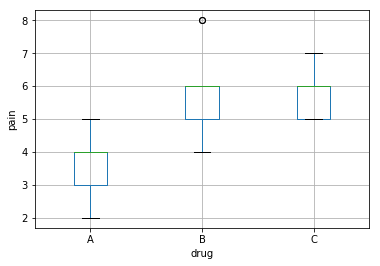

In [2]:
# 11/19

pain = [4, 5, 4, 3, 2, 4, 3, 4, 4, 6, 8, 4, 5, 4, 6, 5, 8, 6, 6, 7, 6, 6, 7, 5, 6, 5, 5]
x = np.array(["A", "B", "C"])
drug = np.repeat(x, 9, axis = 0)
d = {'pain':pain, 'drug':drug}
df = pd.DataFrame(data = d)
df = df.pivot(columns = 'drug', values = 'pain')

plt.xlabel('drug')
plt.ylabel('pain')

df.boxplot(column = ['A', 'B', 'C'])


In [3]:
# 請檢定drug A, B, C三種藥物作用後，這三群病患頭痛程度的平均值是否不一樣：
# Hint: One-way ANOVA（假設三群的變異數相同）
# 同義於 oneway.test(pain ~ drug, data = migraine, var.equal = TRUE)

migraine = ols('pain ~ drug',data = df).fit()
tabel = anova.anova_lm(migraine)
print (tabel)


            df     sum_sq    mean_sq         F    PR(>F)
drug       2.0  28.222222  14.111111  11.90625  0.000256
Residual  24.0  28.444444   1.185185       NaN       NaN


In [4]:
# 請改以無母數方法檢定平均數：
# Hint: 當One way ANOVA的前提假設不滿足時，可用Kruskal-Wallis rank sum test

from scipy import stats

df1 = df.apply(lambda x: pd.Series(x.dropna().values)).fillna('')
kruskal = stats.kruskal(df1['A'], df1['B'], df1['C'])
print (kruskal)



KruskalResult(statistic=14.39546456245112, pvalue=0.0007482807761598261)


In [5]:
# 12/19
# 請以 multiple pairwise-comparisons 找出有具體差異的樣本群：前提是ANOVA分析出有組間差異
# Hint: 針對一個categorical variable進行比較，找出具體是哪兩組之間有差異


from scipy import stats
from statsmodels.stats.multicomp import MultiComparison

mod = MultiComparison(pain,drug)
rtp = mod.allpairtest(stats.ttest_rel, method = 'bonferroni') #pairwise.t.test(x = pain, g = drug, p.adjust = "bonferroni",paired = TRUE)
print (rtp[0])



Test Multiple Comparison ttest_rel 
FWER=0.05 method=bonferroni
alphacSidak=0.02, alphacBonf=0.017
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
  A      B    -6.0083 0.0003   0.001    True 
  A      C    -5.1215 0.0009   0.0027   True 
  B      C    -0.1818 0.8602    1.0    False 
---------------------------------------------


In [6]:
# 請改以 TukeyHSD test：
# Hint: x 應為 fitted anova model

from statsmodels.stats.multicomp import MultiComparison

df_d = pd.DataFrame(data = d)
mc = MultiComparison(df_d['pain'], df_d['drug'])
result = mc.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  A      B     2.1111   0.8297 3.3925  True 
  A      C     2.2222   0.9409 3.5036  True 
  B      C     0.1111  -1.1703 1.3925 False 
--------------------------------------------
